## 01. Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## 02. Import Data Sets

In [3]:
#define path
path = r'/Users/piperdutcher/Documents/Achievement 4/04-2024 Instacart Basket Analysis'

In [4]:
# Import Data Set - ords_prods_merge
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_w_flags.pkl'))

In [3]:
# Import Data Set -

In [4]:
# Import Data Set -

## 03. Reading Exercises

<Axes: xlabel='orders_day_of_week'>

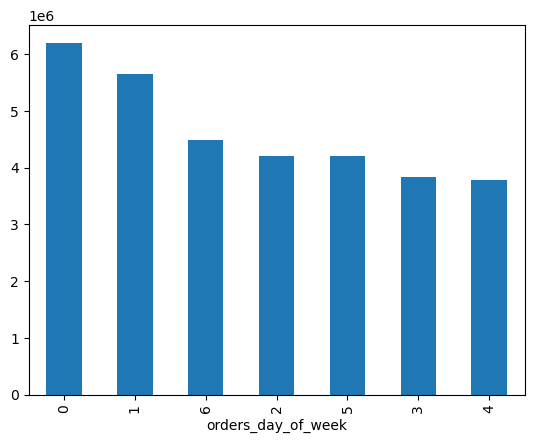

In [5]:
ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

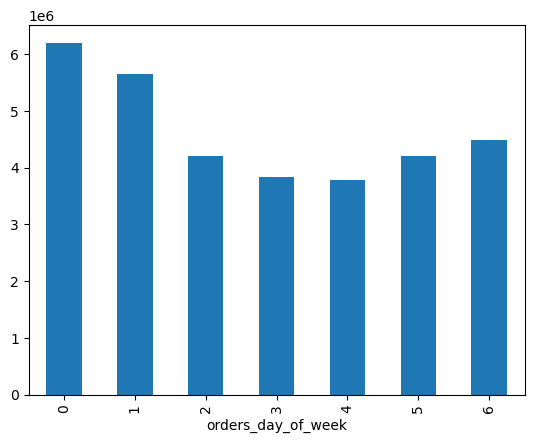

In [6]:
# use sort_indec() to order by index order, rather than largest to smallest

bar = ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

In [7]:
# can use sort_index() for printing frequencies as well...

ords_prods_merge['orders_day_of_week'].value_counts().sort_index()

orders_day_of_week
0    6204182
1    5660230
2    4213830
3    3840534
4    3783802
5    4205791
6    4496490
Name: count, dtype: int64

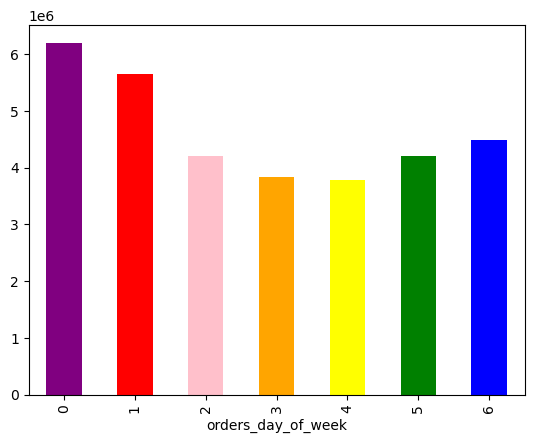

In [10]:
# in the bar() function, color can be added in brackets: ['purple','red', etc]

bar = ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [11]:
# Exporting Charts
# first save as an object, in this case 'bar'
# can access by calling bar.figure, but need to save it first using savefig()

bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

<Axes: ylabel='Frequency'>

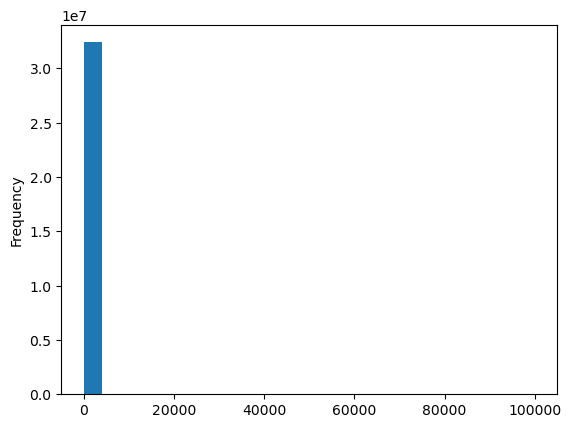

In [12]:
# Creating histograms & Scatterplots

ords_prods_merge['prices'].plot.hist(bins = 25)

In [14]:
# hmm, this doesn't look right. Let's go back to data prep:
#describe prices

ords_prods_merge['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [15]:
# max value looks weird: do more invesgtigation

ords_prods_merge['prices'].mean()

11.980225638383454

In [16]:
ords_prods_merge['prices'].min()

1.0

In [17]:
ords_prods_merge['prices'].median()

7.4

In [18]:
ords_prods_merge['prices'].max()

99999.0

In [19]:
# max item price on instacart shouldn't be $99,999, this is why the histogram looks "broken"

<Axes: xlabel='prices', ylabel='prices'>

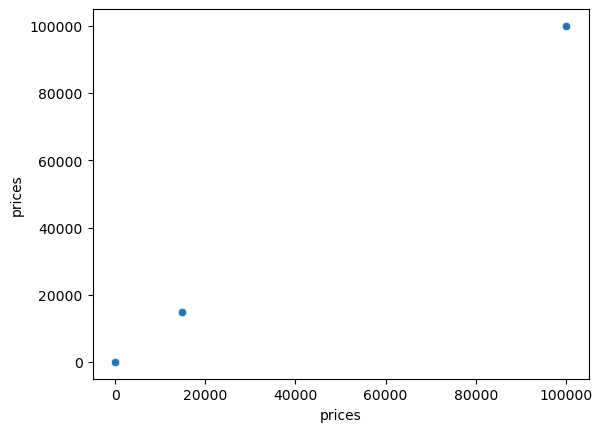

In [20]:
# time to use a scatterplot to identify outliers:

sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

In [22]:
# as the mean is around 12, most of the data points should be distributed around that #
# time for a few more exploratory checks

# need to be able to see all columns, so set option first

pd.set_option('display.max_columns', None)
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_label,busiest_day,busiest_days,busiest_hours,busiest_period_of_day,max_order,loyalty_flag,mean_prod_price,spender_type,median_since_last_order,customer_frequency_type
10030345,912404,17,12,2,14,5.0,21553,5,0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,both,High-range product,Regularly busy,Regularly busy,Busiest hours,Most orders,40,Regular customer,108.648299,High Spender,5.0,Frequent customer
10030346,603376,17,22,6,16,4.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,both,High-range product,Regularly busy,Regularly busy,Regularly busy hours,Fewest orders,40,Regular customer,108.648299,High Spender,5.0,Frequent customer
10030347,3264360,135,2,2,21,13.0,21553,6,0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,both,High-range product,Regularly busy,Regularly busy,Regularly busy hours,Fewest orders,4,New customer,1154.792308,High Spender,12.0,Regular customer
10030348,892534,135,3,0,8,12.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,both,High-range product,Busiest day,Busiest days,Regularly busy hours,Fewest orders,4,New customer,1154.792308,High Spender,12.0,Regular customer
10030349,229704,342,8,1,19,30.0,21553,9,0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,both,High-range product,Regularly busy,Busiest days,Regularly busy hours,Fewest orders,16,Regular customer,114.426619,High Spender,23.0,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29166209,2249946,204099,29,0,8,4.0,33664,1,0,2 % Reduced Fat Milk,84,16,99999.0,both,High-range product,Busiest day,Busiest days,Regularly busy hours,Fewest orders,39,Regular customer,1106.743956,High Spender,4.0,Frequent customer
29166210,2363282,204099,31,0,9,2.0,33664,1,1,2 % Reduced Fat Milk,84,16,99999.0,both,High-range product,Busiest day,Busiest days,Regularly busy hours,Fewest orders,39,Regular customer,1106.743956,High Spender,4.0,Frequent customer
29166211,3181945,204395,13,3,15,8.0,33664,25,0,2 % Reduced Fat Milk,84,16,99999.0,both,High-range product,Regularly busy,Slowest days,Busiest hours,Fewest orders,15,Regular customer,451.153540,High Spender,5.0,Frequent customer
29166212,2486215,205227,7,3,20,4.0,33664,8,0,2 % Reduced Fat Milk,84,16,99999.0,both,High-range product,Regularly busy,Slowest days,Regularly busy hours,Fewest orders,12,Regular customer,1178.381871,High Spender,12.0,Regular customer


In [23]:
# as there are many outliers, it makes more sense to flag these values as missing as they do not fit with our data:

ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [24]:
# check new max value:

ords_prods_merge['prices'].max()

25.0

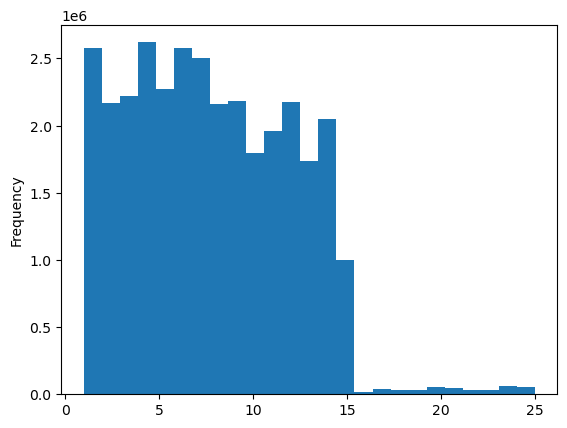

In [26]:
# redo of histogram:

hist = ords_prods_merge['prices'].plot.hist(bins = 25)

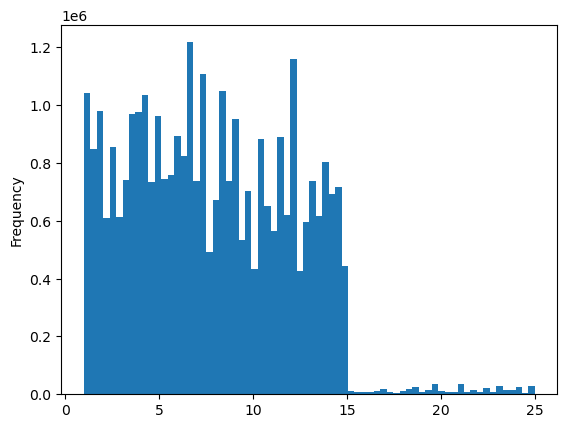

In [28]:
# increase granularity by changing bin size. This will increase level of detail.

hist2 = ords_prods_merge['prices'].plot.hist(bins = 70)

In [29]:
#Export histograms

hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices.png'))

In [30]:
hist2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist2_prices.png'))

In [33]:
# creating line charts
# sometimes this can take a LOT of computing power, consider subsetting or data...
# this will take the bottom 2000000 rows of the dataset but it IS NOT an accurate sample

df = ords_prods_merge[:2000000]

In [34]:
# Sampling data: both samples need to be a representative subsection w the same distribution
# using a 70/30 split:

np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7



In [35]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [36]:
# using the above generated array, you can split the data set into two samples:
# store 70% of the dataset

big = ords_prods_merge[dev]

In [37]:
# store 30% of the dataset
# the '~' negates the argument

small = ords_prods_merge[~dev]

In [38]:
# check to make sure the rows add up!
len(ords_prods_merge)

32404859

In [39]:
len(big) + len(small)

32404859

In [40]:
# reducing the sample to necessary columns only! create a new dataset with only the desired columns

df_2 = small[['orders_day_of_week','prices']]

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


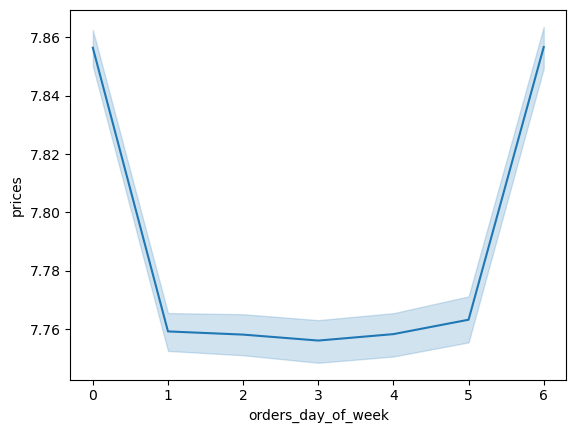

In [41]:
# now its time to actually create a line chart:

line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

In [42]:
# export chart

line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_small_section.png'))

## 04. Task

In [43]:
# will be in parts one and two, upload recent data set to pkl

ords_prods_merge.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'new_orders_products_w_flags.pkl'))

In [44]:
ords_prods_merge.dtypes

order_id                      int64
user_id                       int64
order_number                  int64
orders_day_of_week            int64
order_hour_of_day             int64
days_since_prior_order      float64
product_id                    int64
add_to_cart_order             int64
reordered                     int64
product_name                 object
aisle_id                      int64
department_id                 int64
prices                      float64
_merge                     category
price_label                  object
busiest_day                  object
busiest_days                 object
busiest_hours                object
busiest_period_of_day        object
max_order                     int64
loyalty_flag                 object
mean_prod_price             float64
spender_type                 object
median_since_last_order     float64
customer_frequency_type      object
dtype: object

In [ ]:
# change user_id to string as we do not need to perform mathematical functions on it
ords_prods_merge['user_id']=ords_prods_merge['user_id'].astype('str')